In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

def dateparse(x):
    return datetime.strptime(x, '%Y-%m')


series = pd.read_csv('E:\Amila\Amila\Predictive Analytics\L&D\AirPassengers.csv',  index_col='Month',date_parser=dateparse)


ts_log = np.log(series['#Passengers'])

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

x = results_ARIMA.forecast(steps =120)
predXval = np.exp(x[0])

import datetime
import calendar

def add_months(sourcedate, months):
    #sourcedate = datetime.datetime.strptime(sourcedate, '%Y-%m-%d')
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

x = '2017-05-15'
x = datetime.datetime.strptime(x, '%Y-%m-%d')
Months = []
Months.append(x)

for i in range(119):    
    x = add_months(x,1)    
    Months.append(x)

# intialise data of lists. 
data = {'Name':Months, 'Age':predXval} 
  


c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [4]:
 data

{'Name': [datetime.datetime(2017, 5, 15, 0, 0),
  datetime.date(2017, 6, 15),
  datetime.date(2017, 7, 15),
  datetime.date(2017, 8, 15),
  datetime.date(2017, 9, 15),
  datetime.date(2017, 10, 15),
  datetime.date(2017, 11, 15),
  datetime.date(2017, 12, 15),
  datetime.date(2018, 1, 15),
  datetime.date(2018, 2, 15),
  datetime.date(2018, 3, 15),
  datetime.date(2018, 4, 15),
  datetime.date(2018, 5, 15),
  datetime.date(2018, 6, 15),
  datetime.date(2018, 7, 15),
  datetime.date(2018, 8, 15),
  datetime.date(2018, 9, 15),
  datetime.date(2018, 10, 15),
  datetime.date(2018, 11, 15),
  datetime.date(2018, 12, 15),
  datetime.date(2019, 1, 15),
  datetime.date(2019, 2, 15),
  datetime.date(2019, 3, 15),
  datetime.date(2019, 4, 15),
  datetime.date(2019, 5, 15),
  datetime.date(2019, 6, 15),
  datetime.date(2019, 7, 15),
  datetime.date(2019, 8, 15),
  datetime.date(2019, 9, 15),
  datetime.date(2019, 10, 15),
  datetime.date(2019, 11, 15),
  datetime.date(2019, 12, 15),
  datetime.da

In [5]:
# Create DataFrame 
df_Af_predict = pd.DataFrame(data)

data2 = pd.Series(data=data['Age'], index=data['Name'] )
print(data2)

2017-05-15 00:00:00     443.870975
2017-06-15              470.038230
2017-07-15              504.934976
2017-08-15              540.454801
2017-09-15              567.730677
                          ...     
2026-12-15             1506.941684
2027-01-15             1521.330270
2027-02-15             1535.938099
2027-03-15             1550.769936
2027-04-15             1565.808111
Length: 120, dtype: float64


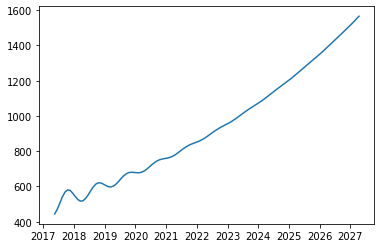

In [20]:
pyplot.plot(data2)